In [ ]:
import yaml

with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['agg.path.chunksize'] = 10**6

In [2]:
df = pd.read_csv(cfg["dataset"])

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
print(df.columns)
print(df.shape[0])

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
7728394


In [5]:
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

0.9999933671345569
0.9999987660271595


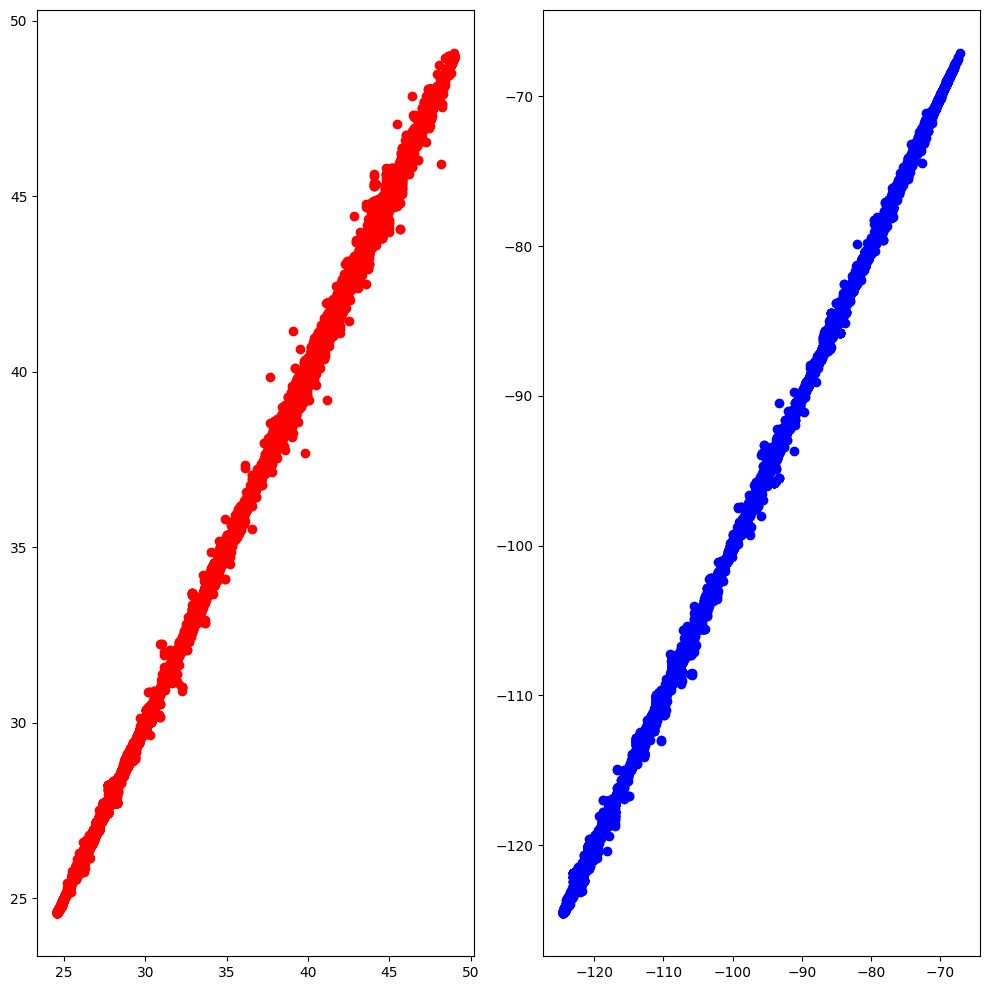

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
df_cor = df.dropna(subset=['Start_Lat', 'End_Lat', 'Start_Lng', 'End_Lng'])
axes[0].plot(df_cor['Start_Lat'], df_cor['End_Lat'], 'ro', linestyle="None")
axes[1].plot(df_cor['Start_Lng'], df_cor['End_Lng'], 'bo', linestyle="None")
fig.tight_layout()

print(df['Start_Lat'].corr(df['End_Lat']))
print(df['Start_Lng'].corr(df['End_Lng']))

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [7]:
nan_df = (df_train.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
7,End_Lat,44.035476
8,End_Lng,44.035476
27,Precipitation(in),28.514657
21,Wind_Chill(F),25.868102
26,Wind_Speed(mph),7.390103
24,Visibility(mi),2.290369
25,Wind_Direction,2.266334
22,Humidity(%),2.253379
28,Weather_Condition,2.244419
20,Temperature(F),2.119506


In [8]:
df_train.drop(columns=['End_Lat', 'End_Lng'], inplace=True)

num_df = df_train.select_dtypes(exclude=['object'])
cat_df = df_train.select_dtypes(include=['object'])
print(len(num_df.columns), len(cat_df.columns))

24 20


In [21]:
num_df.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [8]:
cat_df.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

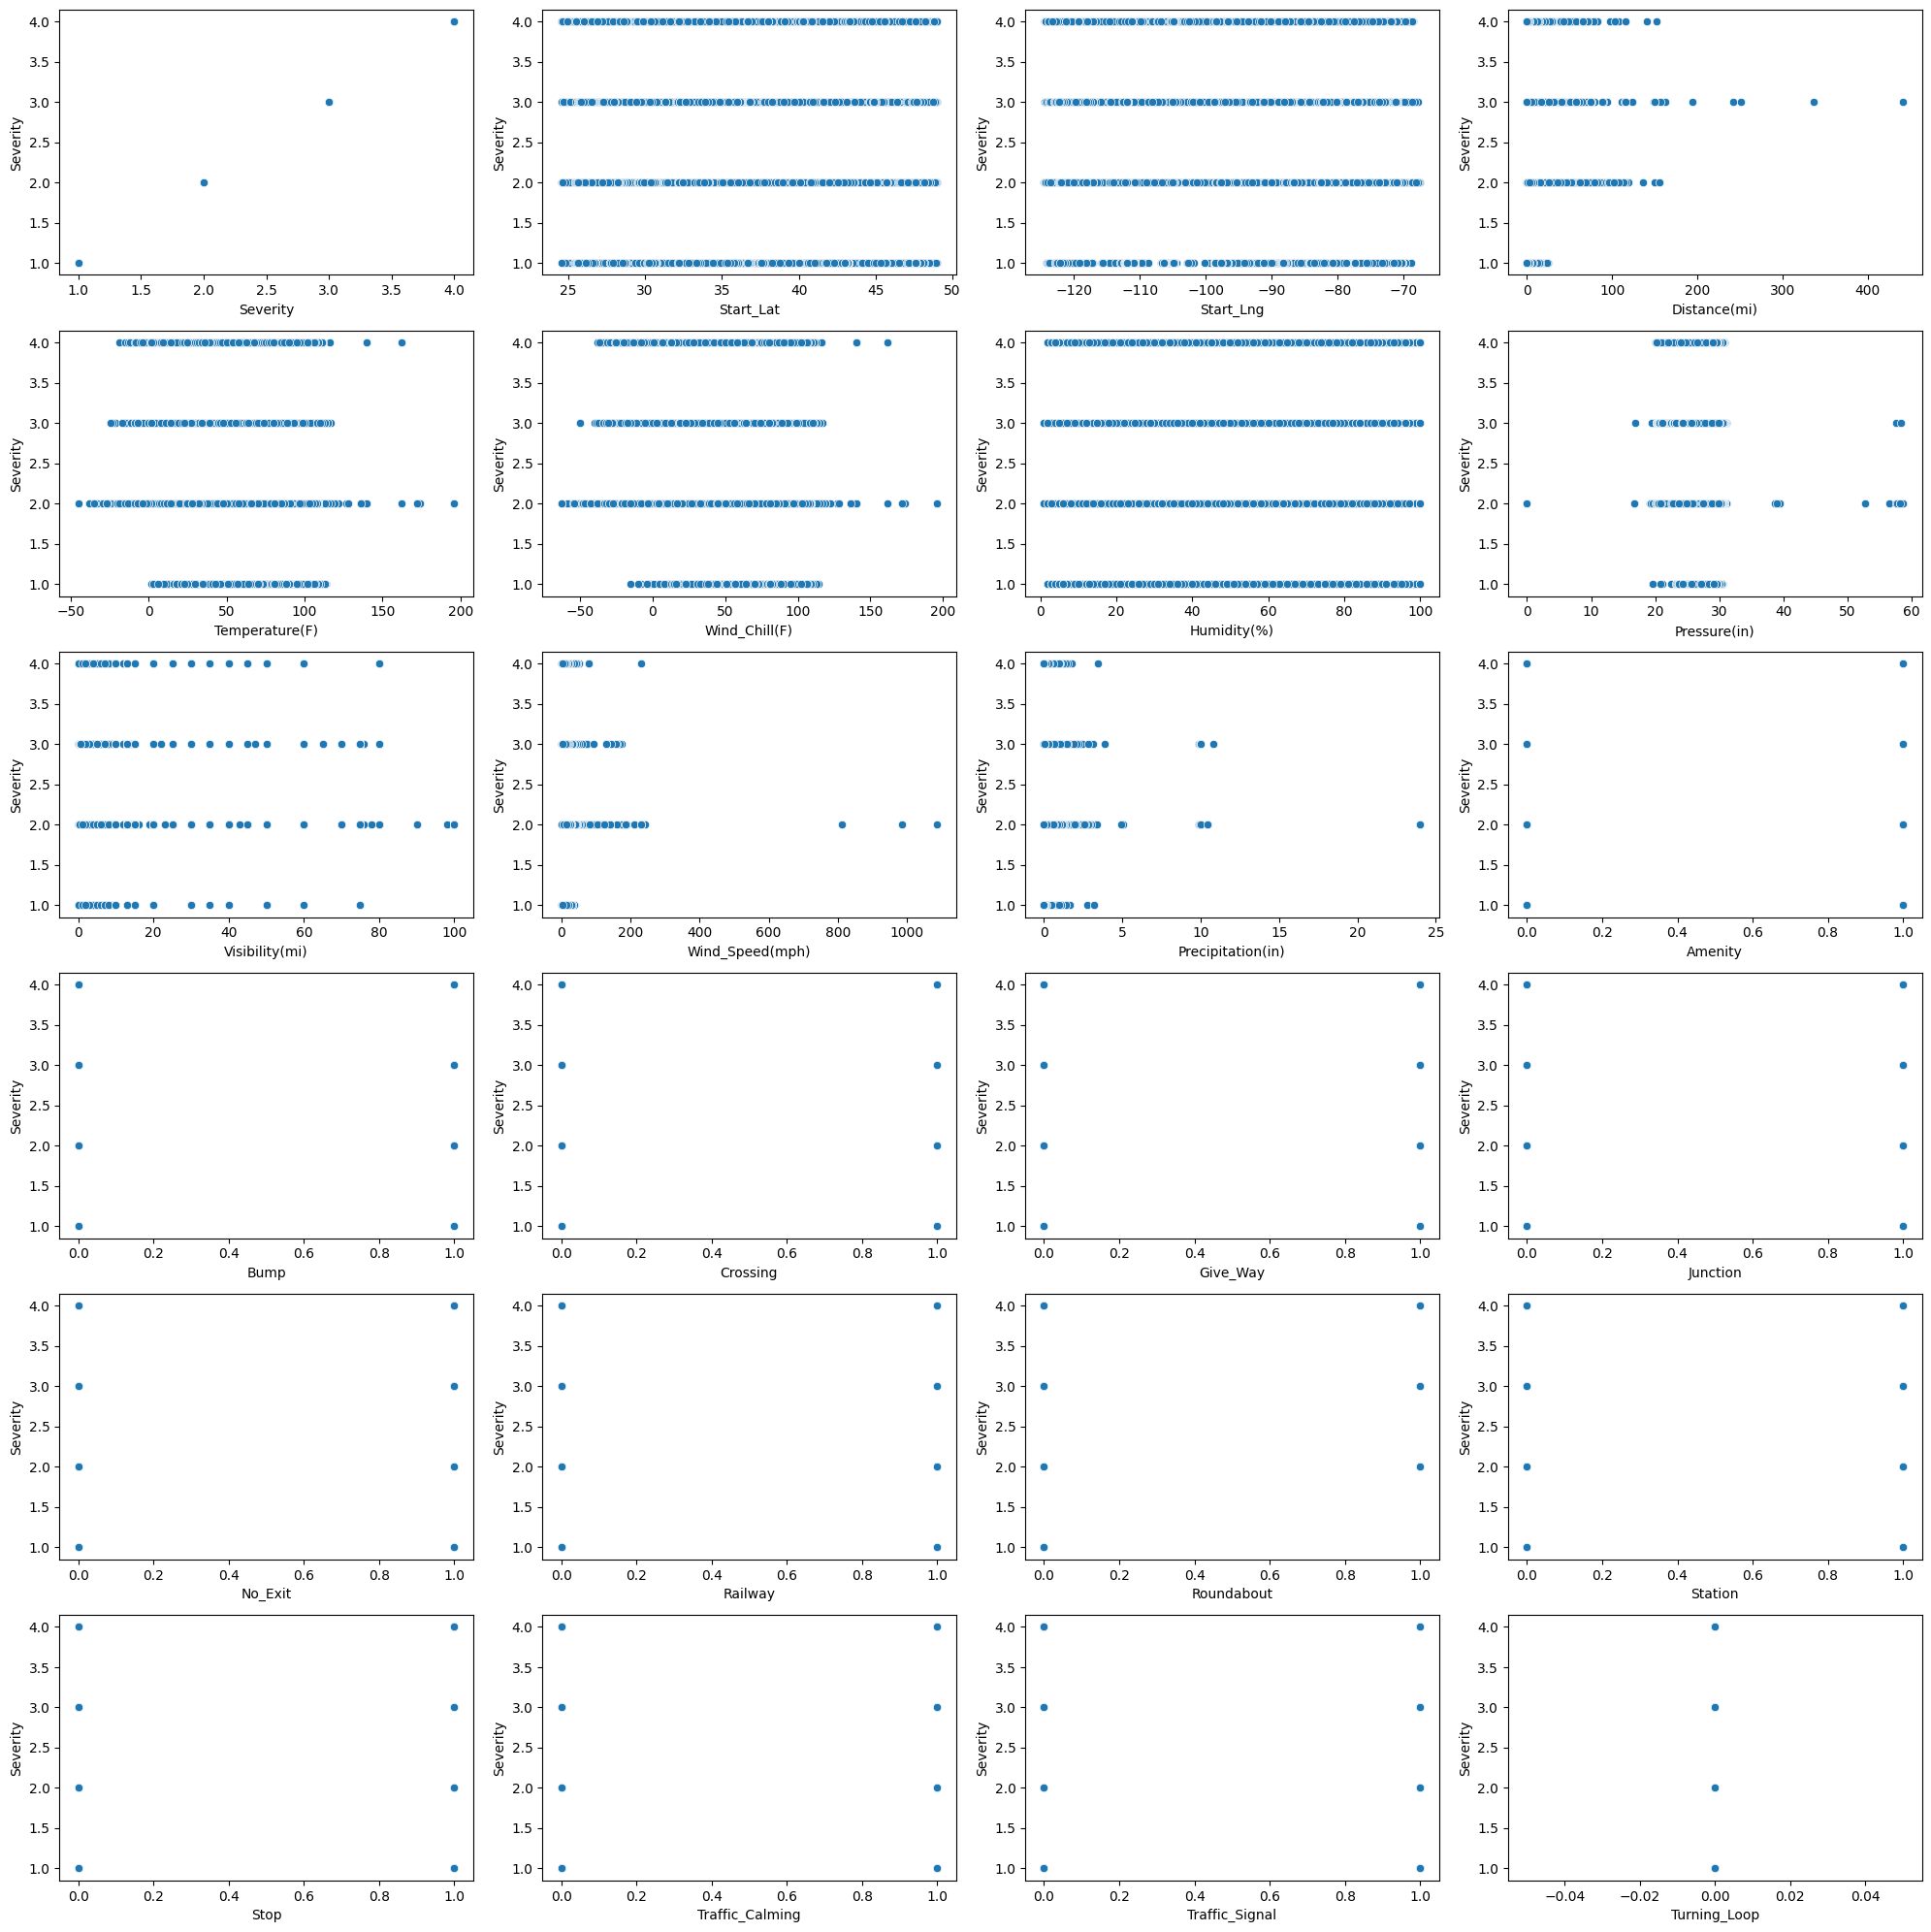

In [ ]:
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='Severity',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [9]:
num_df.drop(columns=['Turning_Loop'], inplace=True)

In [10]:
df_train = df_train.drop(columns=['Turning_Loop'])

In [11]:
num_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,6.182715e+06,6.182715e+06,6.182715e+06,6.182715e+06,6.051672e+06,4.583364e+06,6.043395e+06,6.070063e+06,6.041108e+06,5.725806e+06,4.419735e+06
mean,2.212391e+00,3.620034e+01,-9.470240e+01,5.614313e-01,6.166398e+01,5.824878e+01,6.483113e+01,2.953923e+01,9.090378e+00,7.686010e+00,8.390512e-03
std,4.874937e-01,5.076305e+00,1.739239e+01,1.776407e+00,1.901473e+01,2.239041e+01,2.281816e+01,1.006013e+00,2.686315e+00,5.405675e+00,1.105884e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339846e+01,-1.172198e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582415e+01,-8.776402e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008428e+01,-8.035342e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,9.840000e+02,3.647000e+01


<class 'pandas.core.frame.DataFrame'>


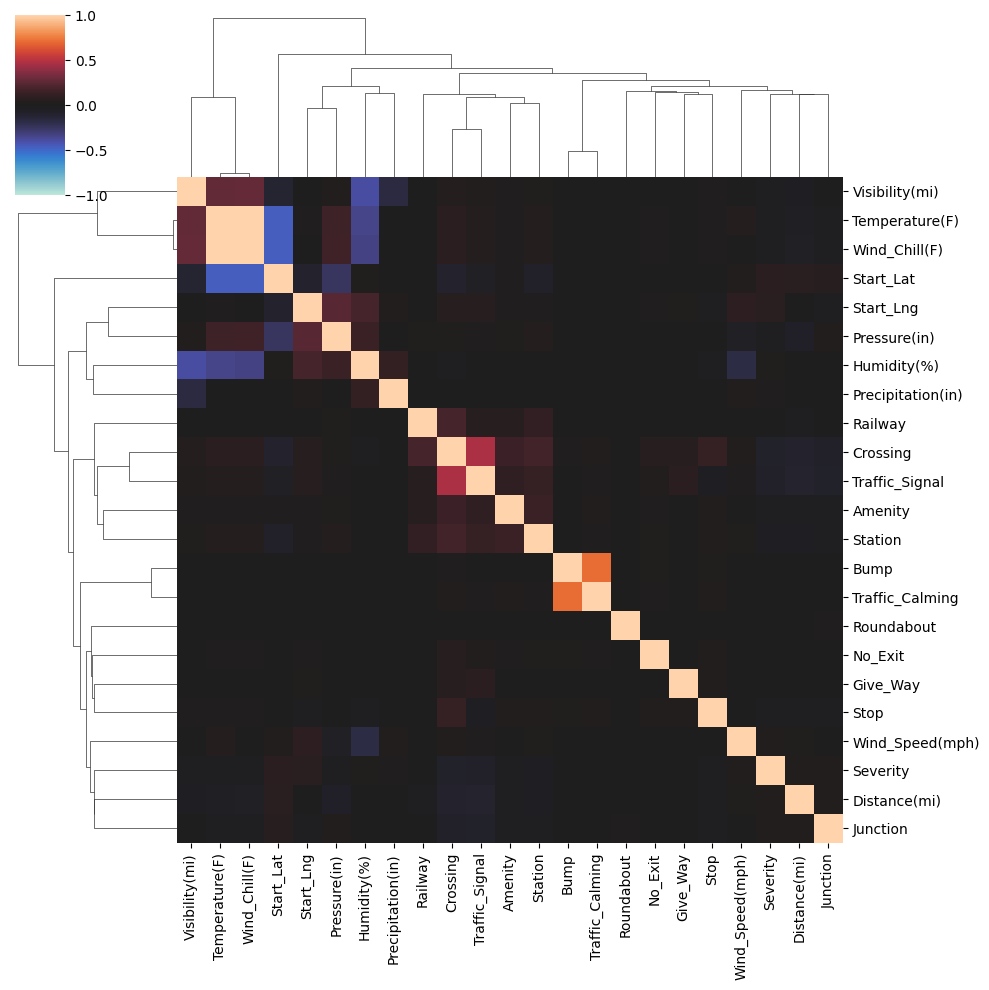

In [ ]:
def corrplot(df_corr, method="pearson", annot=True, **kwargs):
    df_corr = df_corr.dropna()
    matrix_corr = df_corr.corr(method)
    print(type(matrix_corr))
    sns.clustermap(
        df_corr.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )
    return matrix_corr

matrix_corr = corrplot(num_df, annot=None)

In [14]:
matrix_corr

NameError: name 'matrix_corr' is not defined

In [12]:
df_train.drop(columns=['Bump', 'Wind_Chill(F)'], inplace=True)

In [13]:
nan_df = (df_train.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)

In [14]:
nan_df.head(20)

,column_name,percentage
24,Precipitation(in),28.514657
23,Wind_Speed(mph),7.390103
21,Visibility(mi),2.290369
22,Wind_Direction,2.266334
19,Humidity(%),2.253379
25,Weather_Condition,2.244419
18,Temperature(F),2.119506
20,Pressure(in),1.822047
17,Weather_Timestamp,1.555886
39,Nautical_Twilight,0.300111


In [22]:
cat_df.columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [23]:
print(df_train['Precipitation(in)'].median(), df_train['Precipitation(in)'].mean())

0.0 0.008390512100838627


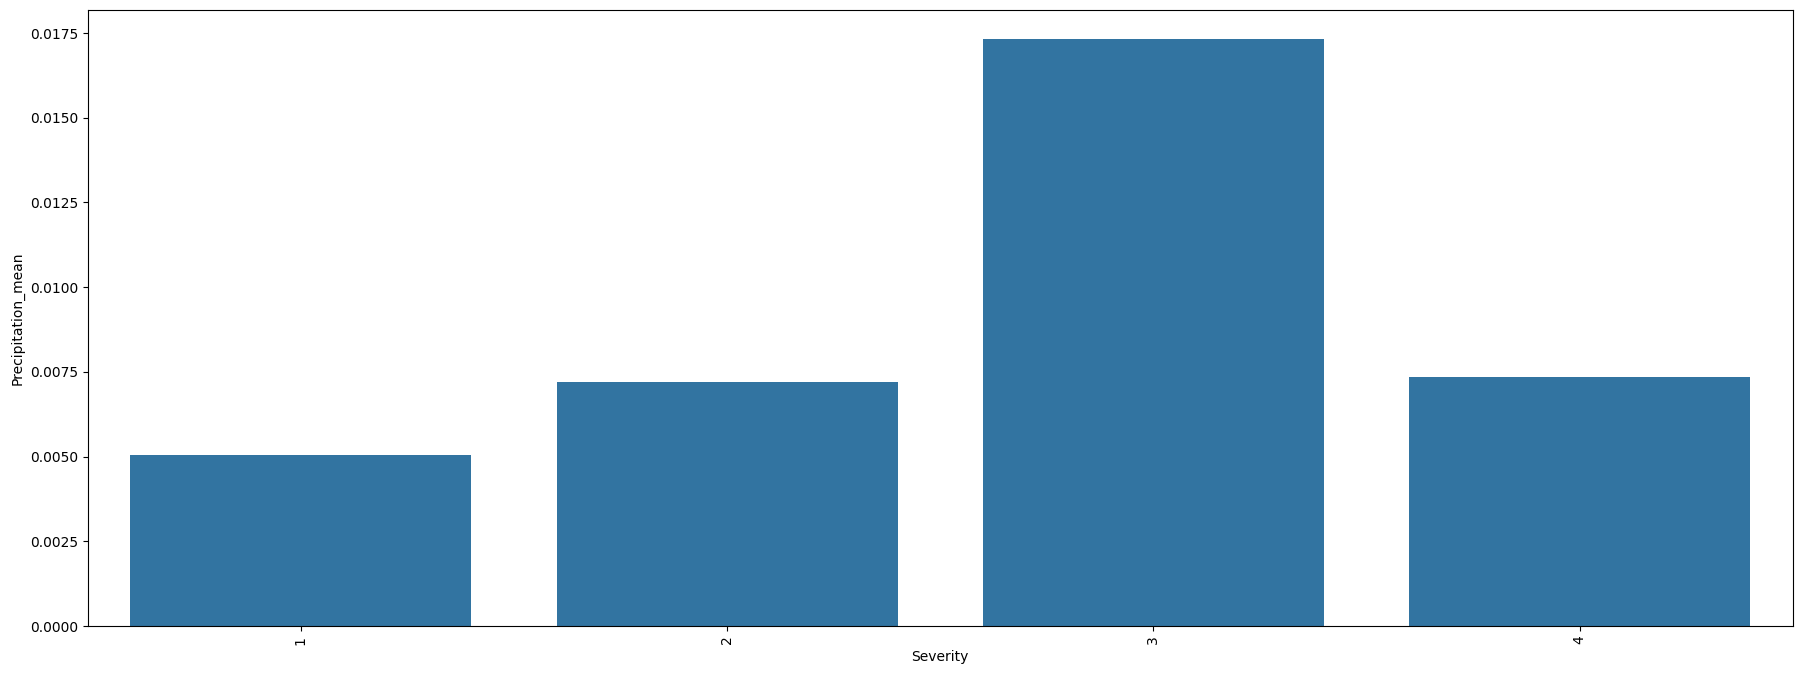

In [ ]:
Severity_grouped = df_train.groupby('Severity')
Severity_lot = (
    Severity_grouped['Precipitation(in)'].mean()
    .reset_index(name='Precipitation_mean')
)

fig, axes = plt.subplots(1, 1, figsize=(22, 8))
axes.tick_params(axis='x', rotation=90)
sns.barplot(x='Severity', y='Precipitation_mean', data=Severity_lot, ax=axes)
plt.show()

In [15]:
df_train['Precipitation(in)'] = df_train.groupby('Severity')['Precipitation(in)'].transform(lambda x: x.fillna(x.mean()))

In [16]:
df_train.dropna()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7301655,A-7351018,Source1,2,2019-10-22 13:43:00,2019-10-22 14:14:31,38.581314,-121.463473,0.000,At E St - Accident.,Capital City Fwy E,...,False,False,False,False,False,False,Day,Day,Day,Day
6602351,A-6650833,Source1,2,2020-10-12 07:32:00,2020-10-12 08:47:28,27.179181,-81.872571,0.065,Incident on US-17 near SW SKATES ST Drive with...,SW Highway 17,...,False,False,False,False,False,False,Day,Day,Day,Day
4258452,A-4290575,Source1,2,2022-06-06 17:58:37.000000000,2022-06-06 20:02:17.000000000,27.446823,-82.485082,0.075,Stationary traffic on FL-70 from Horseshoes Bl...,60th St E,...,False,False,False,False,False,False,Day,Day,Day,Day
5270654,A-5310655,Source1,2,2022-12-16 20:23:31,2022-12-16 21:38:31,32.935933,-96.821680,0.008,Incident on DALLAS PKWY near SOUTHERN BLVD Dri...,Dallas Pkwy,...,False,False,False,False,False,False,Night,Night,Night,Night
5921883,A-5966084,Source1,2,2021-09-10 03:59:30,2021-09-10 04:42:30,38.152681,-121.669708,0.442,Stationary traffic on CA-160 - CA-12 at Isleto...,State Highway 12,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,A-2259334,Source2,2,2019-02-01 16:09:29,2019-02-01 16:38:52,34.772930,-86.528145,0.000,Lane blocked due to accident on US-72 Eastboun...,Highway 72 E,...,False,False,False,False,False,False,Day,Day,Day,Day
5157699,A-5196810,Source1,2,2022-12-22 15:52:30,2022-12-22 17:03:24,41.875348,-87.680341,0.063,At Damen Ave/Exit 28A - Accident. Slippery road.,Eisenhower Expy E,...,False,False,False,False,False,False,Day,Day,Day,Day
2215104,A-2224970,Source2,2,2019-03-18 07:37:51,2019-03-18 10:36:45,31.609051,-86.264664,0.000,Lane blocked due to accident on AL-15 both way...,Brantley Hwy,...,False,False,False,False,False,False,Day,Day,Day,Day
1484405,A-1494244,Source2,2,2020-06-30 05:31:37,2020-06-30 08:04:55,39.601051,-76.487473,0.000,Accident on Schuster Rd both ways at Furnace Rd.,Schuster Rd,...,False,False,False,False,False,False,Night,Day,Day,Day


# Удаление столбцов с почти одними и теми же значениями

In [17]:
def get_almost_constant_columns(df, dropna=True, limit: int = 96):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > limit:
            cols.append(i)
    return cols


In [18]:
cat_df = df_train.select_dtypes(include=['object'])
overfit_cat = get_almost_constant_columns(cat_df, limit=90)
df_train = df_train.drop(overfit_cat, axis=1)
overfit_cat

['Country']

In [19]:
num_df = df_train.select_dtypes(exclude=['object'])
overfit_num = get_almost_constant_columns(num_df, dropna=True, limit=90)
df_train = df_train.drop(overfit_num, axis=1)
overfit_num

['Amenity',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming']

In [21]:
df_train.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

# Удаление выбросов

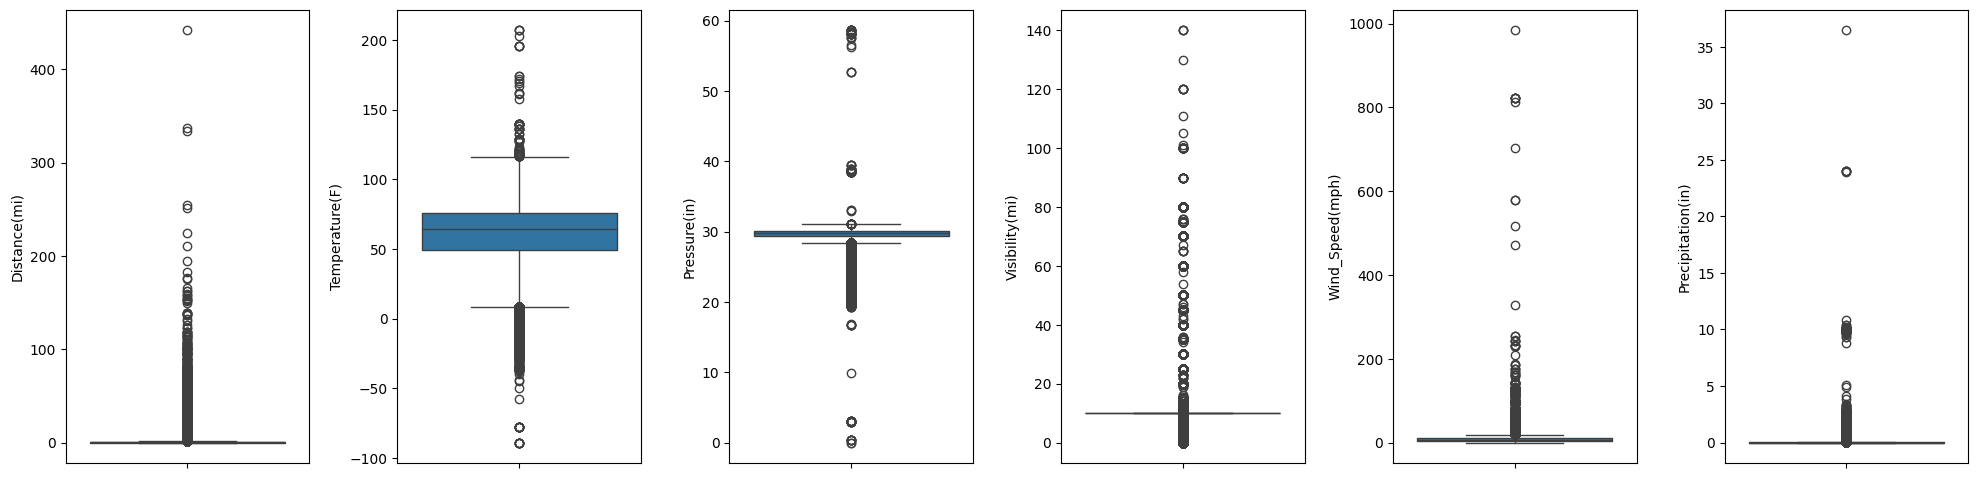

In [22]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df_train[col], data=df_train, ax=ax)
fig.tight_layout(pad=1.5)

In [26]:
for col, upper_bound, down_bound in (
    ('Distance(mi)', 160, -160),
    ('Temperature(F)', 150, -50),
    ('Pressure(in)', 35, 15),
    ('Visibility(mi)', 60, -100),
    ('Wind_Speed(mph)', 200, -400),
    ("Precipitation(in)",6, -15),
):
    df_train = df_train.drop(df_train[df_train[col] > upper_bound].index)
    df_train = df_train.drop(df_train[df_train[col] < down_bound].index)

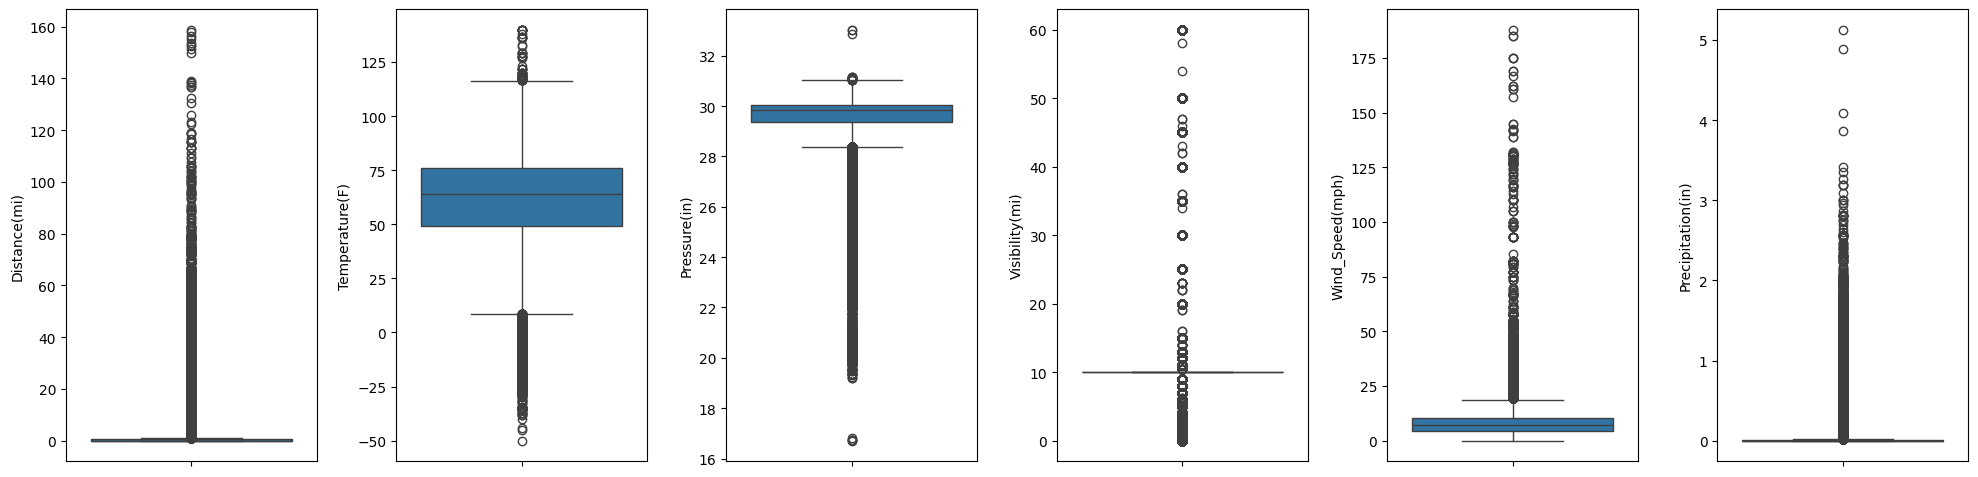

In [27]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df_train[col], data=df_train, ax=ax)
fig.tight_layout(pad=1.5)

In [34]:
sns.histplot(data=df_train['Precipitation(in)'][10**5])

TypeError: object of type 'numpy.float64' has no len()

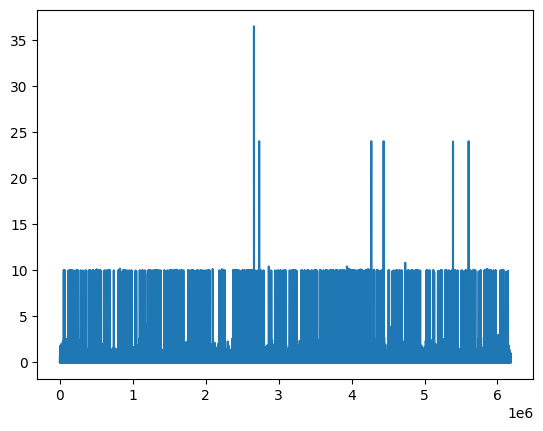

In [21]:
plt.plot([i + 1 for i in range(len(df_train['Precipitation(in)']))], df_train['Precipitation(in)'])